# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [89]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from datetime import timedelta
from datetime import datetime
from webdriver_manager.chrome import ChromeDriverManager
import requests
from selenium import webdriver

In [90]:
#identify the path
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [91]:
# Visit the Mars Temperature Data Site: 
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
response = requests.get(url)
browser.visit(url)
html = requests.get(url).text
article_list_soup = soup(html, 'html.parser')
html_content = response.content
soup = BeautifulSoup(html_content, 'html.parser')


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [92]:
# Extract data as test
title = soup.title
print(title)
print(title.string)

<title>Mars Temperature Data</title>
Mars Temperature Data


In [93]:
Links = soup.find_all('link',href=True)
for link in Links:
    print(link['href'])

css/bootstrap.min.5.2.2.css
css/temp.css


In [94]:
# Create a Beautiful Soup Object and find the table rows using the 'find_all' method (To be revised)
table = soup.find('table', class_='table')
table

<table class="table">
<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.

In [95]:
# find the table element containing the data (checking to see if I can search the data in a table using this code)
table = soup.find('table', {'class': 'data-table'})
print(table)

None


In [148]:
# Loop through each row and extract the data from each cell (td element)
for row in rows:
    cells = row.find_all('td')
    if cells:
# Extract the text content from each cell and print it
        data = [cell.text.strip() for cell in cells]
        print(data)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

['1503', '2017-01-17', '1582', '300', '11', '-74.0', '862.0']
['1502', '2017-01-18', '1583', '301', '11', '-75.0', '862.0']
['1505', '2017-01-19', '1584', '301', '11', '-77.0', '860.0']
['1506', '2017-01-20', '1585', '302', '11', '-76.0', '864.0']
['1504', '2017-01-21', '1586', '303', '11', '-72.0', '858.0']
['1508', '2017-01-22', '1587', '303', '11', '-73.0', '860.0']
['1507', '2017-01-23', '1588', '304', '11', '-72.0', '858.0']
['1510', '2017-01-24', '1589', '304', '11', '-72.0', '857.0']
['1509', '2017-01-25', '1590', '305', '11', '-76.0', '860.0']
['1512', '2017-01-26', '1591', '306', '11', '-73.0', '852.0']
['1511', '2017-01-27', '1592', '306', '11', '-71.0', '857.0']
['1513', '2017-01-28', '1593', '307', '11', '-72.0', '852.0']
['1514', '2017-01-29', '1594', '307', '11', '-74.0', '855.0']
['1515', '2017-01-30', '1595', '308', '11', '-71.0', '855.0']
['1516', '2017-01-31', '1596', '309', '11', '-74.0', '850.0']
['1517', '2017-02-01', '1597', '309', '11', '-73.0', '855.0']
['1519',

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [149]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:
    cells = row.find_all('td')
    if cells:
        data.append([cell.text.strip() for cell in cells])

In [150]:
print(type(rows))

<class 'bs4.element.ResultSet'>


In [151]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])


In [152]:
# Confirm DataFrame was created successfully
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [153]:
#Examine the data types that are currently associated with each column. 
print(df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [154]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['id'] = df['id'].astype(int)
df['sol'] = df['sol'].astype(int)
df['month'] = df['month'].astype(int)
df['ls'] = df['ls'].astype(float)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)



In [155]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [156]:
# 1. How many months are there on Mars?
number_of_months=df['month'].nunique()
print(f'There are', number_of_months ,'months on Mars.')

There are 12 months on Mars.


In [157]:
# 2. How many Martian days' worth of data are there?
num_of_martian_days = df['sol'].nunique()
print(f"There are {num_of_martian_days} Martian days worth of data in the scraped dataset.")


There are 1867 Martian days worth of data in the scraped dataset.


In [158]:
# Question 3: What are the coldest and the warmest months on Mars (at the location of Curiosity)?
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
print(f"The coldest and the warmest months on mars are as below: {avg_min_temp_by_month}")


The coldest and the warmest months on mars are as below: month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


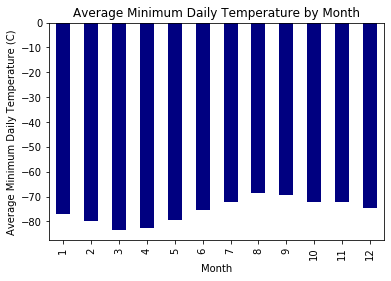

<Figure size 432x288 with 0 Axes>

In [180]:
# Plot the results as a bar chart
fig, ax = plt.subplots()
avg_min_temp_by_month.plot(kind='bar', ax=ax, color= 'Navy')
ax.set_title('Average Minimum Daily Temperature by Month')
ax.set_ylabel('Average Minimum Daily Temperature (C)')
ax.set_xlabel('Month')
#ax.tick_params(axis='both', which='major', labelsize=10)
#ax.grid(True)
plt.show()
plt.savefig('myplot.png')

In [160]:
#Finding the avg_pressure_by_month
avg_pressure_by_month = df.groupby('month')['pressure'].mean().rename_axis('month').reset_index(name='avg_pressure')
print(avg_pressure_by_month)

    month  avg_pressure
0       1    862.488506
1       2    889.455056
2       3    877.322917
3       4    806.329897
4       5    748.557047
5       6    745.054422
6       7    795.105634
7       8    873.829787
8       9    913.305970
9      10    887.312500
10     11    857.014493
11     12    842.156627


In [161]:
# Find the months with the lowest and highest atmospheric pressure on Mars
lowest_pressure_month = avg_pressure_by_month.idxmin().iloc[0]
highest_pressure_month = avg_pressure_by_month.idxmax().iloc[0]     
print(f"The month with the lowest atmospheric pressure on Mars is month {lowest_pressure_month}, with an average daily atmospheric pressure of {avg_pressure_by_month.loc[lowest_pressure_month, 'avg_pressure']:.2f} Pa.")
print(f"The month with the highest atmospheric pressure on Mars is month {highest_pressure_month}, with an average daily atmospheric pressure of {avg_pressure_by_month.loc[highest_pressure_month, 'avg_pressure']:.2f} Pa.")


The month with the lowest atmospheric pressure on Mars is month 0, with an average daily atmospheric pressure of 862.49 Pa.
The month with the highest atmospheric pressure on Mars is month 11, with an average daily atmospheric pressure of 842.16 Pa.


How many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.

In [162]:
#Finding the original Sun longitude first to find out how long does it take to for Mars to complete one orbit around sun
orig_long=df['ls'].loc[0]
orig_long

155.0

In [163]:
#extracting data for further proceeding with the desired info
same_long = df.loc[df['ls'] == orig_long]
same_long


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155.0,6,-75.0,739.0
598,621,2014-07-03,678,155.0,6,-77.0,739.0
599,624,2014-07-04,679,155.0,6,-77.0,738.0
1249,1274,2016-05-20,1346,155.0,6,-75.0,737.0
1250,1277,2016-05-21,1347,155.0,6,-75.0,736.0


In [164]:
# Filter the DataFrame to only include rows with the original Sun longitude
same_long = df.loc[df['ls'] == orig_long]

In [165]:
#calculating the duration of one martin year in earth days
time_diff = same_long.index[-1] - same_long.index[0]
a=same_long['terrestrial_date'].iloc[0]
date_after_one_martial_year = same_long['terrestrial_date'].iloc[1]
one_martial_year= date_after_one_martial_year-a
print(f"There are approximately {one_martial_year} Earth days in a Martian year.")

There are approximately 686 days 00:00:00 Earth days in a Martian year.


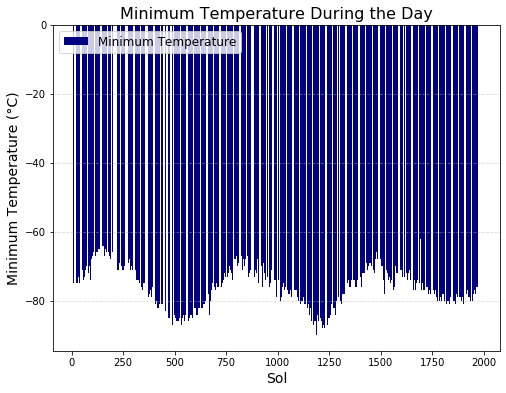

<Figure size 432x288 with 0 Axes>

In [179]:

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the minimum temperature data using a bar plot
ax.bar(df['sol'], df['min_temp'], color='Navy')

# Add grid lines to the plot
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Set the title and labels of the plot
ax.set_title('Minimum Temperature During the Day', fontsize=16)
ax.set_xlabel('Sol', fontsize=14)
ax.set_ylabel('Minimum Temperature (°C)', fontsize=14)

# Add a legend to the plot
ax.legend(['Minimum Temperature'], fontsize=12, loc='upper left')

# Display the plot
plt.show()
plt.savefig('myplot1.png')


In [167]:

# 3. What is the average low temperature by month?
# Convert the date column to datetime format and set it as the index
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df = df.set_index('terrestrial_date')

# Compute the average low temperature by month
avg_low_temp_by_month = df['min_temp'].resample('M').mean()
print(avg_low_temp_by_month)


terrestrial_date
2012-08-31   -75.307692
2012-09-30   -74.035714
2012-10-31   -72.433333
2012-11-30   -68.241379
2012-12-31   -65.733333
                ...    
2017-10-31   -80.133333
2017-11-30   -79.448276
2017-12-31   -79.193548
2018-01-31   -78.500000
2018-02-28   -77.230769
Freq: M, Name: min_temp, Length: 67, dtype: float64


In [144]:
# Plot the average temperature by month
print(df.head())

                  id  sol     ls  month  min_temp  pressure
terrestrial_date                                           
2012-08-16         2   10  155.0      6     -75.0     739.0
2012-08-17        13   11  156.0      6     -76.0     740.0
2012-08-18        24   12  156.0      6     -76.0     741.0
2012-08-19        35   13  157.0      6     -74.0     732.0
2012-08-20        46   14  157.0      6     -74.0     740.0


In [168]:
# Identify the coldest and hottest months in Curiosity's location
# Group the data by month and calculate the average minimum temperature for each month
monthly_temps = df.groupby(df.index.month)['min_temp'].mean()

# Find the coldest and hottest months
coldest_month = monthly_temps.idxmin()
hottest_month = monthly_temps.idxmax()

print(f'The coldest month is {coldest_month} with an average minimum temperature of {monthly_temps[coldest_month]:.2f} degrees Celsius.')
print(f'The hottest month is {hottest_month} with an average minimum temperature of {monthly_temps[hottest_month]:.2f} degrees Celsius.')


The coldest month is 3 with an average minimum temperature of -77.35 degrees Celsius.
The hottest month is 11 with an average minimum temperature of -75.54 degrees Celsius.


In [169]:
# 4. Average pressure by Martian month using groupby
df.groupby('month')['pressure'].mean()


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

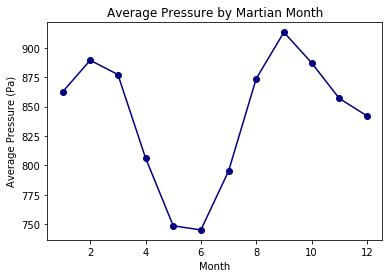

In [181]:
# Group by month and calculate mean pressure
pressure_by_month = df.groupby('month')['pressure'].mean()

# Plot the average pressure by month
pressure_by_month.plot(marker='o', color= 'Navy')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.title('Average Pressure by Martian Month')
plt.savefig('myplot2.png')

In [174]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Number of Martian sols in a year
mars_year_in_sols = 687

# Number of Earth days in a Martian sol
earth_days_in_sol = 1.027

# Calculate the number of Earth days in a Martian year
earth_days_in_mars_year = mars_year_in_sols * earth_days_in_sol

print(f"There are {earth_days_in_mars_year} Earth days in a Martian year.")


There are 705.549 Earth days in a Martian year.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [175]:
# Write the data to a CSV
df.to_csv('mars_table.csv',index=False)


In [ ]:
browser.quit()